In [48]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [49]:
# a)
import sys
sys.path.append('../Laborator 8')
from lab8 import generate_time_series

N = 1000
t = np.arange(N)

time_series = generate_time_series(t)

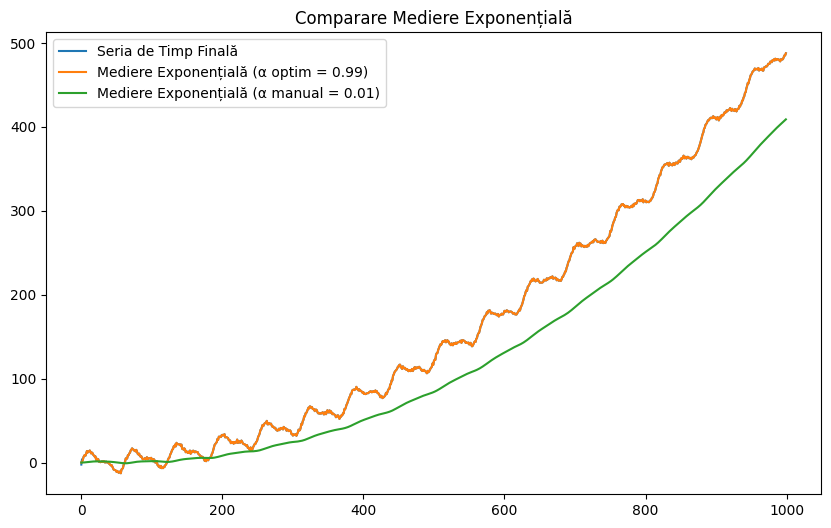

In [50]:
def mediere_exponentiala(series, alpha):
    result = [alpha * sum(((1 - alpha) ** i) * series[t - i] + ((1 - alpha)**t) * series[0] for i in range(t - 1)) for t in range(len(series))]
    return result

def find_alpha(alpha, series):
    s = mediere_exponentiala(series, alpha)
    return sum((s[t] - series[t + 1]) ** 2 for t in range(N - 2))

alpha_values = np.linspace(0.01, 0.99, 100)
values = [find_alpha(alpha, time_series) for alpha in alpha_values]

optimal_alpha = alpha_values[np.argmin(values)]

time_series_optimal = mediere_exponentiala(time_series, optimal_alpha)

alpha_manual = 0.01
time_series_manual = mediere_exponentiala(time_series, alpha_manual)

plt.figure(figsize=(10, 6))
plt.title("Comparare Mediere Exponențială")
plt.plot(time_series, label="Seria de Timp Finală")
plt.plot(time_series_optimal, label=f"Mediere Exponențială (α optim = {optimal_alpha:.2f})")
plt.plot(time_series_manual, label=f"Mediere Exponențială (α manual = {alpha_manual:.2f})")

plt.legend()
plt.show()

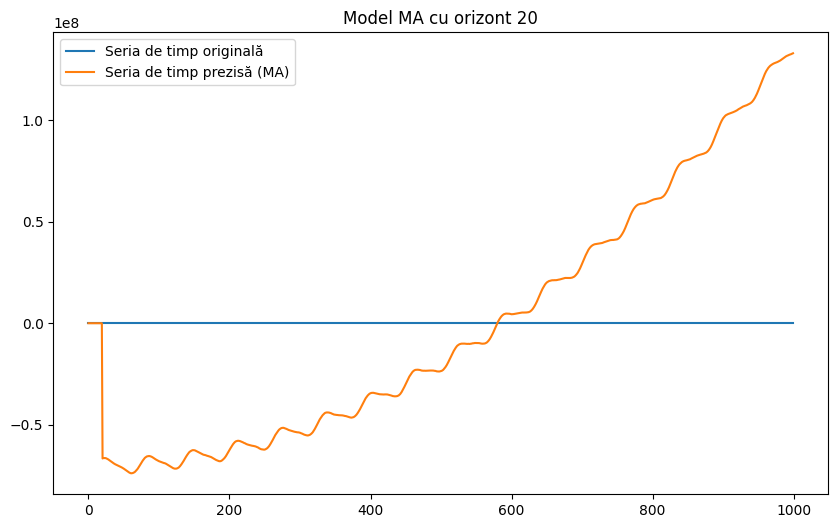

In [51]:
def calc(time_series, q):
    mu = np.mean(time_series)

    errors = time_series - mu

    thetas = np.zeros(q)

    for i in range(q, N):
        for j in range(1, q+1):
            thetas[j-1] += errors[i-j] * errors[i]

    thetas /= N

    return mu, errors, thetas

def predict_ma_model(mu, thetas, errors, q):
    predicted_series = np.zeros(N)

    for i in range(q, N):
        predicted_series[i] = mu + np.sum(thetas * errors[i-q:i])

    return predicted_series

q = 20 

muVal, errors, thetasVal = calc(time_series, q)

predicted_series = predict_ma_model(muVal, thetasVal, errors, q)

plt.figure(figsize=(10, 6))
plt.plot(t, time_series, label='Seria de timp originală')
plt.plot(t, predicted_series, label='Seria de timp prezisă (MA)')
plt.title(f'Model MA cu orizont {q}')
plt.legend()
plt.show()

Optimal order: (2, 0, 2)


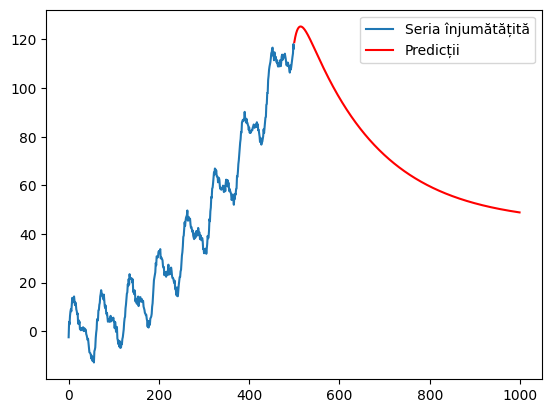

In [52]:
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

model = pm.auto_arima(time_series, suppress_warnings=True, max_p=20, max_q=20, d=0)
order = model.get_params()['order']
print(f"Optimal order: {order}")

midpoint = len(time_series) // 2

first_half = time_series[:midpoint]
second_half = time_series[midpoint:]

plt.plot(range(midpoint), first_half, label='Seria înjumătățită')

model = ARIMA(first_half, order=order)
results = model.fit()

predictions = results.predict(start=midpoint, end=len(time_series)-1)

plt.plot(range(midpoint, len(time_series)), predictions, label='Predicții', color='red')


plt.legend()
plt.show()